
# Исследование объявлений о продаже квартир

**Описание проекта**  

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель исследования**

* Установить параметры, которые позволят построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 
* Изучить время продажи квартиры. Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
* Убрать редкие и выбивающиеся значения.
* Найти, какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от площади, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.
* Выделить населённые пункты с самой высокой и низкой стоимостью жилья. 
* Выяснить, какая область входит в центр. 
* Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

**Ход исследования**  

Исследование содержит следующие этапы:
1. Изучение данных из файла.  
2. Предобработка данных.  
    * 2.1 Обработка пропусков
    * 2.2 Замена типа данных] 
    * 2.3 Обработка дубликатов  
 
3. Расчеты и добавление результатов в таблицу.
4. Исследовательский анализ данных.
5. Общий вывод.

##  Изучение данных из файла

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# чтение файла с данными и сохранение в переменной data
if os.path.exists('/datasets/real_estate_data.csv'):
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
else:
    data = pd.read_csv('real_estate_data.csv', sep = '\t')

In [3]:
display(data.sample(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12491,8,3150000.0,43.00,2016-07-04T00:00:00,1,2.8,6.0,21.00,4,NaN,...,9.5,2.0,Отрадное,NaN,NaN,NaN,NaN,NaN,NaN,16.0
20732,5,6900000.0,89.00,2016-04-27T00:00:00,3,2.6,12.0,57.80,6,NaN,...,11.0,0.0,Санкт-Петербург,36472.0,13251.0,0.0,NaN,0.0,NaN,112.0
13841,6,3450000.0,36.60,2018-02-16T00:00:00,1,2.6,10.0,NaN,6,NaN,...,NaN,NaN,Санкт-Петербург,21003.0,15446.0,2.0,679.0,1.0,113.0,44.0
19339,15,14500000.0,161.50,2017-04-10T00:00:00,4,NaN,7.0,105.00,6,NaN,...,15.8,NaN,Санкт-Петербург,26313.0,5016.0,3.0,417.0,1.0,118.0,NaN
15295,5,4800000.0,44.00,2019-04-03T00:00:00,2,2.5,9.0,27.30,7,NaN,...,6.8,NaN,Санкт-Петербург,18023.0,13251.0,0.0,NaN,0.0,NaN,14.0
14471,4,4115000.0,35.40,2018-01-01T00:00:00,1,NaN,16.0,15.60,8,NaN,...,10.7,2.0,Санкт-Петербург,30166.0,9014.0,0.0,NaN,0.0,NaN,337.0
7626,14,5490000.0,72.20,2017-10-16T00:00:00,3,NaN,10.0,43.70,3,NaN,...,8.5,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,322.0
2410,3,3350000.0,37.84,2018-02-01T00:00:00,1,NaN,25.0,15.16,2,NaN,...,12.0,NaN,Санкт-Петербург,22425.0,24137.0,0.0,NaN,2.0,398.0,91.0
23323,10,4300000.0,46.00,2017-07-20T00:00:00,1,2.8,23.0,18.00,2,NaN,...,11.0,0.0,Санкт-Петербург,15377.0,13486.0,0.0,NaN,1.0,825.0,111.0
13108,5,3380000.0,32.60,2017-10-13T00:00:00,1,2.5,9.0,16.80,7,NaN,...,8.7,1.0,Санкт-Петербург,11415.0,13050.0,0.0,NaN,1.0,597.0,30.0


In [4]:
# получение общей информации о данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца. 

Согласно документации к данным:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении


###  Вывод

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Необходимо заменить тип данных:**

1. На тип int, для удобства просмотра, у следующих столбцов: 
* last_price
* floors_total

2. На тип datetime у столбца - first_day_exposition;

3. На тип bool у столбца - is_apartment.

In [5]:
# определение количества пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

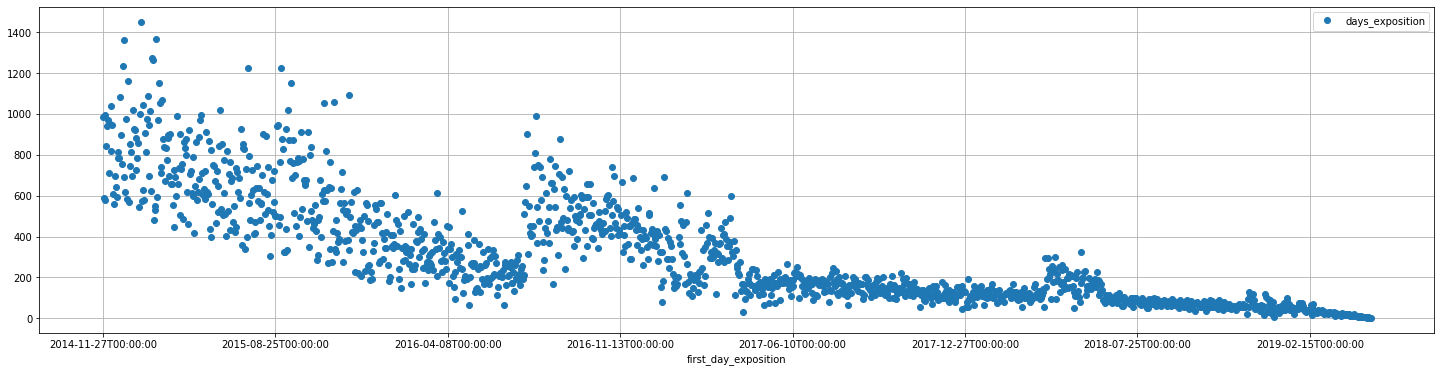

In [6]:
#исследуем, как пропуски в столбце days_exposition распределены относительно даты открытия объявления 
(
data.pivot_table(index='first_day_exposition', values='days_exposition')
    .plot(style='o', grid=True, figsize=(25, 6)) 
)  

###  Вывод

В таблице с данными есть пропуски в столбах:

* ceiling_height (38,8% пропусков)

* floors_total (0,4% пропусков)

* living_area  (8,0% пропусков)

* is_apartment  (88,3% пропусков)

* kitchen_area (9,6% пропусков)

* balcony (48,6% пропусков) 

* locality_name (0,2% пропусков)

* airports_nearest (23,4% пропусков)

* cityCenters_nearest (23,3% пропусков)

* parks_around3000 (23,3% пропусков)

* parks_nearest (65,9% пропусков)

* ponds_around3000 (23,3% пропусков)

* ponds_nearest (61,6% пропусков)

* days_exposition (13,4% пропусков)

В столбах **floors_total** и **locality_name** , в сумме пропуски не превышаю 1%, поэтому просто удалим пропущенные значения в данных столбах.

Самое большое количество пропусков в столбце **is_apartment**, эти данные должны были заполняться ползователем, можно предположить, что не заполнили данные значения именно те, у кого не аппартаменты, скорее всего таких квартир большенство, отсюда и объяснение почему такой большой процент пропусков. В дальнейшем анализе, нам данный столбец не понадобится, но чтоб не потерять другие важные данные для исследования, мы не будем его удалять, а оставим так как есть.

Достаточно большой процент пропусков в столбце **ceiling_height**, возможно пользователи посчитали данную информацию не самой важной в объявлении, поэтому решили ее не указывать. Высота потолков нам нужны для дальнейшего анализа, поэтому мы пропуски заменим на медиану значений. Заменим на медиану потому, что в данных о потолках есть сильно выбивающие значения (например 100м). Далее уберем сильно выбивающие значения.

Пропуски в значениях жилой площади и площади кухни: столбец **living_area**  заменим его пустые значения на среднее значение, зависящее от количества комнат, в столбце **kitchen_area** пропуски заменим на произведение коэффициента площади кухни ко всей площади на общую площадь квартиры.

Пользователи, неуказавшие наличие балкона в столбце **balcony**, скроей всего по причине его отсутствия, но так как данный столбец конкретно в нашем исследовании нам не понадобится, мы оставим пропуски в нем так как есть.

В столбце **cityCenters_nearest** после просмотра таблицы с данными, видно, что пропуски в основном стоят напротив населенных пунктов, находящихся рядом с Санкт-Петербургом. В самом же Санкт-Петербурге почти везде расстояния до центра указаны, лишь небольшой процент есть пропусков, что не сильно повлияет на анализ. Для нашего исследования как раз и понадобятся именно расстояние до центра в самом Питере, поэтому с пропусками мы ничего делат не будем, оставим их как есть.

Все осталные пропуски в последующих столбцах - это данные полученые автоматически на основе картографических данных. Процент пропусков достаточно велик, поэтому, чтобы не потерять другие данные, удалять мы их не будем. Данные пропуски в тех параметрах, которые мы не используем для дальнейшего исследования, поэтому оставим их как есть. На результатах исследования это никак не скажется. 

Исследовав в столбце **days_exposition** как значения распеделенны относительно даты публикации, наглядно видно, чем позднее дата тем меньше среднее значение количества дней размещения публикации, это может говорить о том, что большее количество пропусков именно в поздних датах публикации, что может означать, что квартира еще не продалась, поэтому объявление не снято с публикации. Тот небольшой процент пропусков на раних датах публикации говорит о том, что либо забыли снять объявление после продажи, либо все еще квартира продается. В любом случае, случайными эти пропуски назвать нельзя, поэтому мы их оставим как есть, удалять не будем.

In [7]:
# получим список характерных значений при помощи метода describe()
d = data.describe() 

In [8]:
#посмотрим данные только где количество комнат равно 0
data_zero_rooms = data.query('rooms == 0')
data_zero_rooms.sample(5, random_state=42)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17626,12,3150000.0,22.0,2017-05-20T00:00:00,0,NaN,16.0,15.0,14,NaN,...,NaN,2.0,Санкт-Петербург,12581.0,13821.0,1.0,38.0,1.0,851.0,515.0
13953,21,3255000.0,28.2,2017-09-26T00:00:00,0,NaN,24.0,20.0,2,NaN,...,NaN,NaN,Санкт-Петербург,41466.0,11538.0,0.0,NaN,0.0,NaN,119.0
1574,0,2200000.0,22.0,2017-11-03T00:00:00,0,NaN,18.0,15.0,16,NaN,...,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
8886,10,2450000.0,15.5,2018-08-22T00:00:00,0,NaN,5.0,10.0,2,NaN,...,NaN,NaN,Санкт-Петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0
18782,0,2500000.0,25.0,2017-10-08T00:00:00,0,NaN,22.0,17.0,19,NaN,...,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,8.0


In [9]:
#посмотрим количество объявлений, где пользователи поставили 0 комнат
len(data_zero_rooms) 

197

In [10]:
#посмотрим общую площадь квартир при количестве комнат равных 0
data_zero_rooms['total_area'].unique()

array([ 27.  ,  25.  ,  27.11,  34.4 ,  24.1 ,  17.  ,  26.1 ,  35.  ,
        23.  ,  29.  ,  32.  ,  26.  ,  31.  ,  22.  ,  30.  ,  23.98,
        27.55,  27.1 ,  28.4 ,  26.49,  28.9 ,  24.  ,  73.6 ,  21.4 ,
        29.3 ,  28.  ,  25.4 ,  20.  ,  19.5 ,  30.3 ,  27.81,  26.8 ,
        32.3 ,  42.63,  29.2 ,  27.3 ,  21.3 ,  19.  ,  18.8 ,  15.5 ,
        38.3 ,  16.  ,  23.4 ,  27.56,  24.8 ,  28.3 ,  23.7 ,  44.2 ,
        24.75,  20.5 ,  29.1 ,  26.7 ,  25.27,  27.32,  23.06,  23.5 ,
        32.4 ,  21.  ,  24.2 ,  18.  ,  24.9 ,  58.4 ,  28.2 ,  24.05,
        24.4 ,  25.2 ,  43.3 ,  27.4 ,  23.3 ,  32.2 ,  32.03,  25.7 ,
        42.1 ,  22.3 ,  28.01,  32.8 ,  26.23,  25.3 ,  28.05,  31.1 ,
        22.5 ,  25.9 ,  32.5 ,  23.8 , 371.  ,  24.6 ,  30.5 ,  25.41,
        98.4 ,  23.6 ,  22.2 ,  27.5 ,  28.16,  27.6 ,  71.  ,  28.5 ,
        24.5 ,  22.7 ,  34.  ,  30.1 ,  27.7 ,  26.05,  23.39])

In [11]:
#посмотрим при количестве комнат равных нолю, какие уникальные значения есть в столбце 'is_apartment'
data_zero_rooms['is_apartment'].unique()

array([nan, False], dtype=object)

In [12]:
#посчитаем сколько постаило пользователей, что это "не аппартаменты".
len(data_zero_rooms.query('is_apartment==False'))

6

###  Вывод

* В столбце **rooms** мы видим, что в значениях есть 0. 
* Процент пользователей указавших количество комнат -0, составляет 0,8% от общего числа. 
* Посмотрев таблицу data_zero_rooms видно, что общая и жилая площадь данных квартир не большая. 
* Посмотрев уникальные значения общей площади, видно, что не так много значений с большой площадью, что как раз и говорит о небольшом проценте кто поставил False в столбце 'is_apartment', все остальные значения предполагают, что это либо аппартаменты, либо 1-комнатные квартиры.  
* Сложно предположить к каким квартирам относятся строки где пользователи указали 0 комнат: к аппартаментам или однокомнатным, а может и очень маленьким двухкомнатным квартирам. 
* Поэтому, так как пользователей поставивших ноль меньше 1% и на дальнейшее исследование это сильно не повлияет, оставим 0 как есть и не будем делать предположений какие именно это квартиры.

## Предобработка данных

### Обработка пропусков

In [13]:
# От строк с пропусками в столбцах 'floors_total', 'locality_name' избавимся методом dropna(). 
data = data.dropna(subset=['floors_total', 'locality_name']) 

In [14]:
# найдем коэффициент площади кухни ко всей площади
kitchen_coef = data['kitchen_area'].median() / data['total_area'].median()
kitchen_coef

0.175

In [15]:
#заменим пропуски в столбце 'kitchen_area' на произведение kitchen_coef на общую площадь квартиры 
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_coef * data['total_area'])

In [16]:
#заменим пропуск в столбце 'ceiling_height' на медиану высоты потолков
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 

In [17]:
#прежде, чем заменить пропуски в 'living_area', проверим корреляцию между параметрами 'living_area' и 'rooms'
data['living_area'].corr(data['rooms'])

0.8461168530398958

####  Промежуточный вывод

Коэффициент корреляции очень высок и говорит о том, что между этими двумя параметрами, достаточно сильная связь. Поэтому заменим пропуски в жилой площади на основании количества комнат.

In [18]:
#группируем сначала всю таблицу по числу комнат, потом берем столбец с жилой площадью,
#вычисляет ее среднее и заполняем с помощью метода transform средним все пропуски в группах
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('mean'))

In [19]:
# убедимся, что в таблице исчесли пропуска, там где мы их заменили
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

### Замена типа данных

In [20]:
# для удобства просмотра данных меняем тип данных на целочисленный в столбцах 
columns = ['last_price', 'floors_total']
for column in columns:
    data[column] = data[column].astype('int') 

In [21]:
# заменяем тип данных на в столбце 'is_apartment' 
data['is_apartment'] = data['is_apartment'].astype('bool') 

In [22]:
# заменяем тип данных на в столбце 'first_day_exposition' 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

In [23]:
# убедимся, что тип данных изменился
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

### Обработка дубликатов

In [24]:
# посмотрим все уникальные значения в столбце 'locality_name'
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

####  Промежуточный вывод

Очень много названий населенных пунктов, видно, что есть дубликаты, слово поселок написано с "ё" и "е".

Заменим во всех словах поселок букву "ё" на "е".

In [25]:
#посчитаем количество уникалных названий населенных пунктов до замениы буквы ё на е.
len(data['locality_name'].unique())

364

In [26]:
#меняем с помощью метода str.replace во всех словах столбца 'locality_name' букву ё на е
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

In [27]:
#посчитаем количество уникалных названий населенных пунктов после замениы буквы ё на е.
len(data['locality_name'].unique())

330

###  Вывод

* В предобработке данных мы удалили пропуски, которые составляли меньше 1%. Заменили пропуски в столбцах: living_area, kitchen_area, ceiling_height.

* Заменили в ряде столбцов тип данных, для удобства просмотров и легкости вычислений.

* Нашли неявные дубликаты. Поменяв в словах букву ё на е, мы сократили количество уникальных названий населенных пункто на 34, с 364 до 330.

## Расчёты и добавление результатов в таблицу

In [28]:
#посчитаем и добавим в таблицу: цену квадратного метра, столбец price_m_2 для удобства просмотра сделаем целочисленным
data['price_m_2'] = (data['last_price'] / data['total_area']).astype('int')

In [29]:
#посчитаем и добавим в таблицу: день недели публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday

In [30]:
#посчитаем и добавим в таблицу: месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

In [31]:
#посчитаем и добавим в таблицу: год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

In [32]:
#посчитаем и добавим в таблицу: этаж квартиры; варианты — первый, последний, другой
def floor_flat(row):

    floors_total = row['floors_total']
    floor = row['floor']
    
    if floor == 1:
        return 'первый'

    elif 1 < floor < floors_total:
        return 'другой'
    
    elif floor == floors_total:
        return 'последний'
    
data['floor_flat'] = data.apply(floor_flat, axis=1)

In [33]:
#посчитаем и добавим в таблицу: соотношение жилой и общей площади,
data['useful_area_ratio'] = data['living_area'] / data['total_area']

In [34]:
#посчитаем и добавим в таблицу: соотношение площади кухни к общей
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

In [35]:
#посмотрим таблицу с добавленными столбцами
data.sample(10, random_state=50) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m_2,weekday,month,year_exposition,floor_flat,useful_area_ratio,kitchen_area_ratio
9991,0,4050000,43.00,2017-12-07,2,2.65,12,27.00,9,True,...,1.0,917.0,14.0,94186,3,12,2017,другой,0.627907,0.175000
9787,19,7490000,59.01,2019-03-19,2,3.10,4,41.35,3,True,...,0.0,NaN,36.0,126927,1,3,2019,другой,0.700729,0.157092
3091,6,11748225,82.00,2017-06-29,2,2.65,5,34.00,4,True,...,1.0,190.0,119.0,143271,3,6,2017,другой,0.414634,0.195122
3023,6,4280000,62.00,2017-07-06,3,2.65,9,42.00,9,True,...,1.0,301.0,44.0,69032,3,7,2017,последний,0.677419,0.101613
2650,9,4600000,52.60,2018-11-15,2,2.70,5,30.60,3,True,...,0.0,NaN,111.0,87452,3,11,2018,другой,0.581749,0.182510
21277,20,2800000,32.70,2017-12-19,1,2.65,14,18.00,3,True,...,NaN,NaN,216.0,85626,1,12,2017,другой,0.550459,0.305810
21054,1,5980000,45.00,2019-02-09,2,2.55,9,28.00,2,True,...,0.0,NaN,18.0,132888,5,2,2019,другой,0.622222,0.155556
22100,9,8700000,81.40,2018-10-29,3,2.55,10,51.60,1,True,...,0.0,NaN,112.0,106879,0,10,2018,первый,0.633907,0.154791
1979,11,7500000,95.00,2018-03-10,3,2.78,5,52.00,3,True,...,0.0,NaN,44.0,78947,5,3,2018,другой,0.547368,0.178947
9180,11,4690000,56.00,2016-04-02,3,2.65,5,41.00,2,True,...,0.0,NaN,146.0,83750,5,4,2016,другой,0.732143,0.107143


###  Вывод

Для дальнейшего анализа, категоризировали столбцы по дню недели, месяцу, году и добавили в таблицу с данными. Так же добавили столбец по категории этажей: верхний, нижний и другой. И добавили столбцы соотношения площадей.

## Исследовательский анализ данных

### Изучение параметров

In [36]:
#для легкости понимания переведем рубли в тыс.руб.
data['last_price'] = (data['last_price']/1000)

In [37]:
# создадим функцию, которая отрисует по очереди гистограммы для столбцов 'total_area', 'last_price', 'rooms', 'ceiling_height'
# интервал построения графиков рассчитываем автоматически, от Q1-4*iqr до Q3+4*iqr
def draw_plot(data, column):
    data_desc = data[column].describe()
    
    # межквартирльный размах
    iqr = data_desc[6] - data_desc[4]
    
    # левый и правый "ус"    
    left_whisker = round(data_desc[4] - 4 * iqr, 2)
    right_whisker = round(data_desc[6] + 4 * iqr, 2)

    # левый "ус" не должен быть меньше минимального значения
    if left_whisker < data_desc[3]:
        left_whisker = data_desc[3] 
        
    # правый "ус" не должен быть больше максимального значения
    if right_whisker > data_desc[7]: 
        right_whisker = data_desc[7]
        
    return [left_whisker, right_whisker]

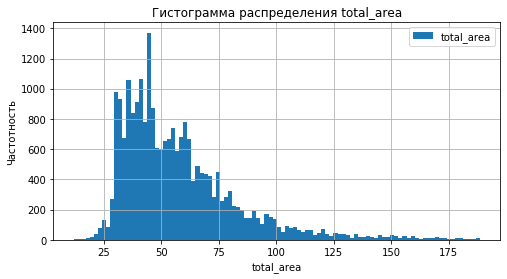

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

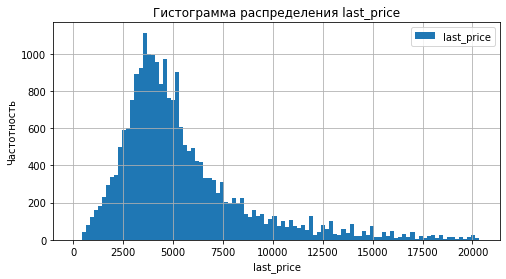

count     23565.000000
mean       6540.058260
std       10910.934722
min          12.190000
25%        3400.000000
50%        4646.000000
75%        6790.000000
max      763000.000000
Name: last_price, dtype: float64

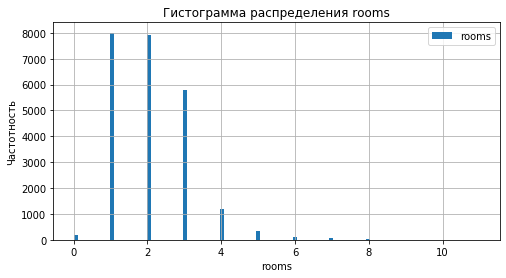

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

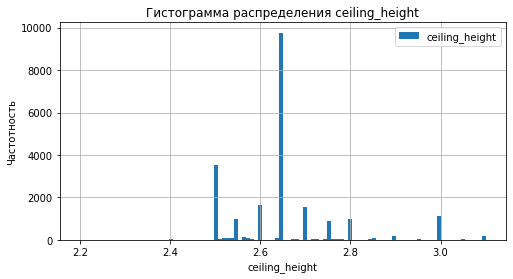

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [38]:
#переберем циклом все нужные нам столбцы
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for col in columns:
    rang = draw_plot(data, col)
    data.plot(y=col, kind='hist', bins=100, grid=True, figsize=(8,4), range=(rang[0], rang[1]))
    plt.title(f'Гистограмма распределения {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Частотность')
    plt.show()
    display(data[col].describe())

###  Вывод

**total_area**

Часто встречаются выбросы на площадях 31, 36, 42, 45, 60 м2 . Сложно предположить почему на данных площадях есть выбросы, возможно это самые популярные площади в планировках. Поэтому с данными выбросами ничего делать не будем, оставим как есть, потому что возможно они играют важную роль в исследовании. 

Видно, что больше всего квартир с площадью от 35 до 60м2. 

Квартиры площадью 150м2 и выше есть, но в единичных случаях. Сильно маленких квартир площадью менее 20м2, по количеству очень мало, близко к нолю. Выбросом считается, все что больше правого "уса", то есть больше 114м2.

**last_price**

Из гистограммы видно, что чаще всего встречается стоимость квартир от 3 до 5 млн.руб.

Есть аномально маленькая стоимость квартиры 12тыс.руб. 

Самая дорогая квартира стоит 763000 тыс.руб. Выбросом считается все что больше правого "уса", то есть больше 11875 тыс.руб.

**rooms**

В большей степени одно и двух-комнатных квартир, что вполне похоже на правду. Достаточное количество трехкомнатных квартир. И далее, с увеличением числа комнат, уменьшается количество таких квартир. Есть квартира с 19-тью комнатами.

Среднее от медианы почти не отличается это говорит о том, что нет сильно завышенных значений. Выбросом считается, все что больше правого "уса", то есть больше 6 комнат.

**ceiling_height**

По гистограмме видно, что чаще всего встречаются квартиры с высотой потолков - 2,65м.

Минимальная высота - 1м, максимальная - 100м. Среднее от медианы не сильно отличаются, что говорит о малом количестве выбросов.

По диаграмме размаха выбросом считается, все что меньше левого "уса" - 2,45, и больше правого "уса", то есть больше 2,85 м.

###  Задание №1
####  Изучить время продажи квартиры. Построить гистограмму. Посчитать среднее и медиану. Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"

In [39]:
#применим метод describe() для подсчета среднего и медианы количество дней сколько было размещенно объявление
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

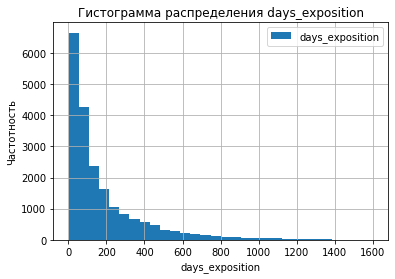

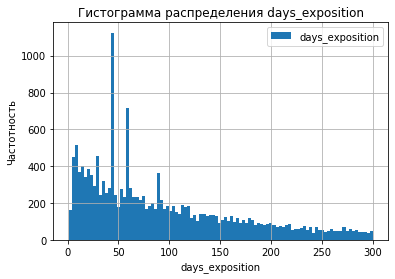

In [40]:
#построим гистограммы по столбцу 'days_exposition' с разным числом корзин и шагом, для наглядности
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
plt.title(f'Гистограмма распределения days_exposition')
plt.xlabel(f'days_exposition')
plt.ylabel('Частотность')
plt.show()
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,300))
plt.title(f'Гистограмма распределения days_exposition')
plt.xlabel(f'days_exposition')
plt.ylabel('Частотность')
plt.show()

###  Вывод

Можно обратить внимание, среднее в 2 раза больше медианы, это может означать, что в распределении есть длинный хвост с высокими значениями или несколько очень больших значений. Это может влияет на среднее, но не на медиану. 

Для построения гистограммы специльно убрали нулевые значения, так как это пропуски в данных.

По гистограмме видно, что с увеличением дней уменьшается количество объявлений, что вполне логично. Обычное время продажи квартир примерно до 100 дней.  

Мы видим выбросы на 7, 30, 45, 60 и 90 дней. Посмотрев правила размещения объявлений на Яндекс.Недвижимости, действительно в эти дни объявления автомотически снимаются с публикаций. Поэтому их стоит удалить из выборки, что бы они не исскажали наше исследование.

Так же достаточное количество объявлений, с продажей до 200 дней (это примерно до полугода). Уже значительно меньше, когда происходит продажа до 1 года. Есть и очень большие значения, которые как мне кажется необосновано большие для продажи квартиры, например такие как свыше 550 дней (больше 1,5 года). Бывает, что квартиры долго продаются, но это единичные случаи. Когда у человека не одна квартира, и он может себе позволить держать цену за которую хочет продать как можно дольше. Но у нас в России обычно ситуация наоборот, люди продают свое жилье и тут же вкладывают в новое, поэтому им проще скинуть цену и продать быстрее, чем долго держать ее. Поэтому вполне логично, что такие числа попадают за пределы правого "уса" диаграммы размаха и все, что выше 510 дней считается выбросом.

Очень большое количество объявлений, говорит о том, что квартира продалась меньше чем за 30 дней. Это говорит о том, что продажи прошли очень быстро.

###  Задание №2
####  Убрать редкие и выбивающиеся значения. Опишите, какие особенности обнаружили

In [41]:
# создадим новую таблицу data_new, в которой уберем в столбце 'total_area' все что считается выбросом
# то есть все что больше правого "уса" по диаграмме размаха.
right_whisker_total_area = round(d['total_area'][6] + 1.5 * (d['total_area'][6]-d['total_area'][4]), 2)
data_new = data.query('total_area <= @right_whisker_total_area') 

In [42]:
# в таблице data_new уберем в столбце 'last_price' все что считается выбросом
# то есть все что больше правого "уса" по диаграмме размаха.
right_whisker_last_price = round(d['last_price'][6] + 1.5 * (d['last_price'][6]-d['last_price'][4]), 2)
data_new = data_new.query('last_price <= @right_whisker_last_price')

In [43]:
# в таблице data_new уберем в столбце 'rooms' все что считается выбросом
# то есть все что больше правого "уса" по диаграмме размаха.
right_whisker_rooms = round(d['rooms'][6] + 1.5 * (d['rooms'][6]-d['rooms'][4]), 2)
data_new = data_new.query('rooms <= @right_whisker_rooms')

In [44]:
# в таблице data_new уберем в столбце 'ceiling_height' все что считается выбросом
# то есть все что меньше левого "уса" по диаграме размаха и больше правого "уса".
left_whisker_ceiling_height = round(d['ceiling_height'][4] - 1.5 * (d['ceiling_height'][6]-d['ceiling_height'][4]), 2)
right_whisker_ceiling_height = round(d['ceiling_height'][6] + 1.5 * (d['ceiling_height'][6]-d['ceiling_height'][4]), 2)
data_new = data_new.query('@left_whisker_ceiling_height <= ceiling_height <= @right_whisker_ceiling_height')

In [45]:
# в таблице data_new уберем в столбце 'days_exposition' все что считается выбросом
# то есть все что больше правого "уса" по диаграмме размаха и так же уберем значения с 0.
right_whisker_days_exposition = round(d['days_exposition'][6] + 1.5 * (d['days_exposition'][6]-d['days_exposition'][4]), 2)
data_new = data_new.query('days_exposition <= @right_whisker_days_exposition and days_exposition != 0')

In [46]:
# далее уберем аномальные выбросы, такие как 7, 30, 45, 60 и 90 дней
data_new = data_new.query('days_exposition != 7 and days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90')

In [47]:
#посмотрим характерные значения измененых столбцов
data_new[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']].describe()

,total_area,last_price,rooms,ceiling_height,days_exposition
count,16681.000000,16681.000000,16681.000000,16681.000000,16681.000000
mean,52.655539,5001.402448,1.887896,2.657778,130.670403
std,18.505072,3026.740045,0.877796,0.130324,121.346035
min,12.000000,12.190000,0.000000,2.200000,1.000000
25%,38.350000,3290.000000,1.000000,2.600000,42.000000
50%,48.000000,4300.000000,2.000000,2.650000,89.000000
75%,63.000000,5900.000000,3.000000,2.650000,186.000000
max,114.600000,53000.000000,6.000000,3.220000,511.000000


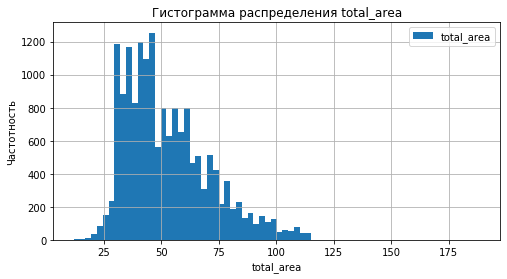

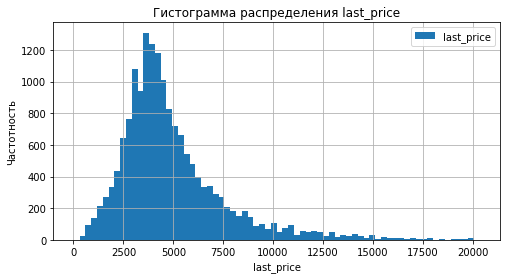

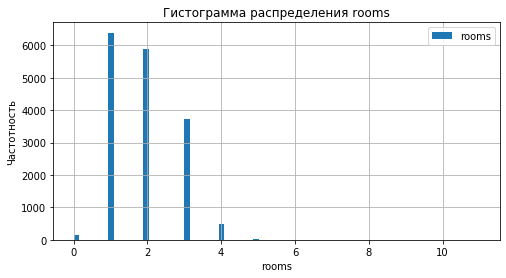

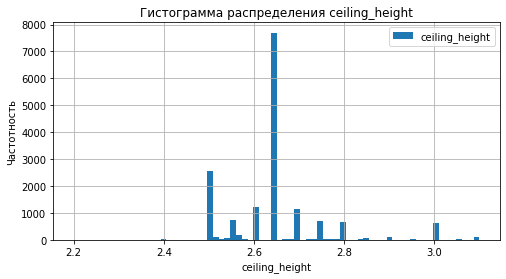

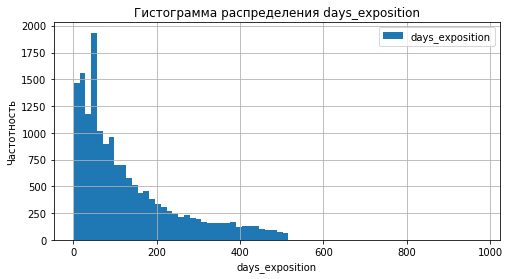

In [48]:
#построим гистограммы обновленной таблицы data_new, где мы убрали все редкие и выбивающие значения
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']

for col in columns:
    rang = draw_plot(data, col)
    data_new.plot(y=col, kind='hist', bins=70, grid=True, figsize=(8,4), range=(rang[0], rang[1]))
    plt.title(f'Гистограмма распределения {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Частотность')
    plt.show()

###  Вывод

**total_area** после удалений редких значений, стандартное отклонение уменьшилось почти в 2 раза, а среднее и медиана почти сравнялись. Это говорит о том, что данные стали чище и могут показать более достоверный результат при дальнейшем исследовании.

**last_price** после удалений редких значений, стандартное отклонение уменьшилось, а средняя и медиана почти сранялись. Это говорит о том, что данные стали чище и могут показать более достоверный результат при дальнейшем исследовании. Есть несколько выбивающихся значений, но они не похожи на аномалии, так как квартиры могут действительно сильно отличаться по цене, имея более лучший ремонт например.

**rooms** до удаления редких значений, график итак имел правильное распределение, но удалив редкие значения мы добились еще более чистых данных.

**ceiling_height** гистограмма не имеет нормального распределения, видно, что есть выброс на высоте потолка 2,5м, но среднее отклонение почти 0, и среднее значение почти равно с медианной. Поэтому мы не будем его исключать. 

**days_exposition** исключив все редкие значения, выбросы и нулевые значения мы получили гистограмму более правильного распределения, уменьшили стандартное отклонение почти в 2 раза. Медиана со средним сократили разрыв в значении между собой, тем самым мы привели данные к более реалистичному виду.

###  Задание №3
#### Какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от площади, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучить зависимость от даты размещения: дня недели, месяца и года. "Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья. 

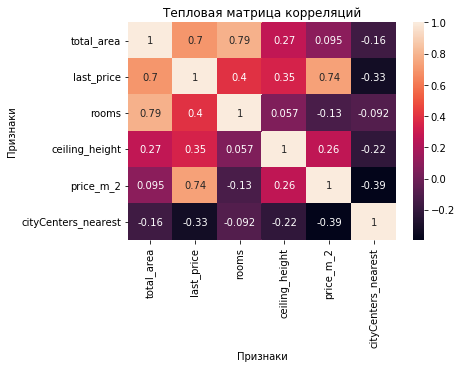

In [49]:
#посчитаем коэффициент корреляции 
corr = data_new[['total_area', 'last_price', 'rooms', 'ceiling_height', 'price_m_2', 'cityCenters_nearest']].corr()
figsize=(10, 8)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True )
plt.title('Тепловая матрица корреляций')
plt.xlabel("Признаки")
plt.ylabel("Признаки")
plt.show()

Text(0, 0.5, 'Стоимость квартиры')

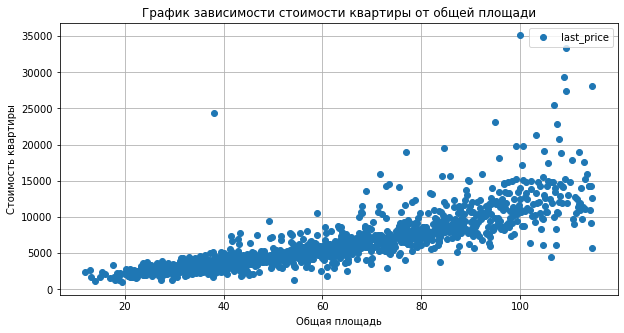

In [50]:
# построим график зависимости last_price от total_area при помощи 
data_new.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(10, 5))
plt.title('График зависимости стоимости квартиры от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Стоимость квартиры')

####  Промежуточный вывод

По графику и коэффициенту корреляции видно, что зависимоть цены от площади есть, достаточно сильная. Но так же видно, что дорогие квартиры могут быть и небольшой площади.

Text(0, 0.5, 'Стоимость квартиры')

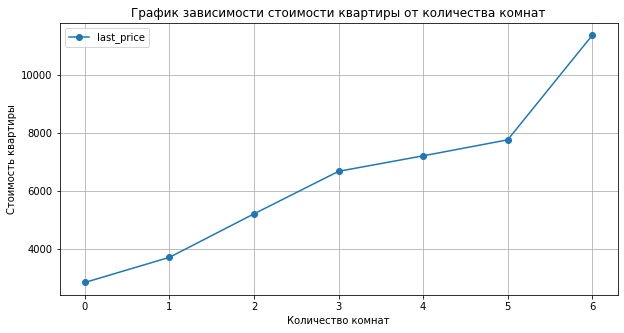

In [51]:
#посмотрим зависимость стоимости квартир от количества комнат 
data_new.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(10, 5))
plt.title('График зависимости стоимости квартиры от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость квартиры')

Text(0, 0.5, 'Цена 1м2')

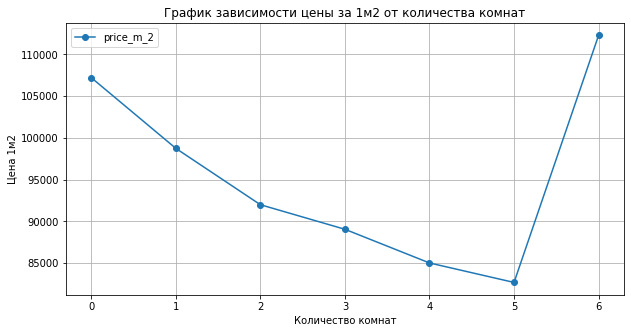

In [52]:
#посмотрим зависимость цены за 1м2 от количества комнат 
data_new.pivot_table(index='rooms', values='price_m_2').plot(grid=True, style='o-', figsize=(10, 5))
plt.title('График зависимости цены за 1м2 от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена 1м2')

####  Промежуточный вывод

По графику видно, что стоимость квартиры зависит от количества комнат. Чем больше комнат, тем выше стоимость. Связь есть, но не всегда, так как по графику видно, что 5-ти комнатная квартира дешевле, чем четырех комнатная.

Но если расмотреть цену за 1м2, то зависимость будет противоположная: у однокомнатных квартир стоимость за квадрат дороже.

Text(0, 0.5, 'Стоимость квартиры')

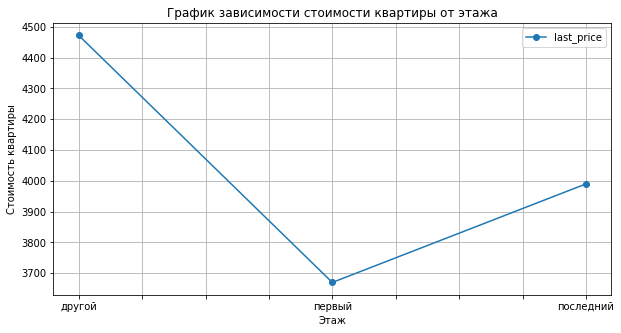

In [53]:
#посмотрим зависимость цены от этажа 
data_new.pivot_table(index='floor_flat', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(10, 5))
plt.title('График зависимости стоимости квартиры от этажа')
plt.xlabel('Этаж')
plt.ylabel('Стоимость квартиры')

####  Промежуточный вывод

По графику видно, что цена квартиры зависит от этажа. Стоимость квартир на первом этаже дешевле, чем на последнем. 

Text(0, 0.5, 'Стоимость квартиры')

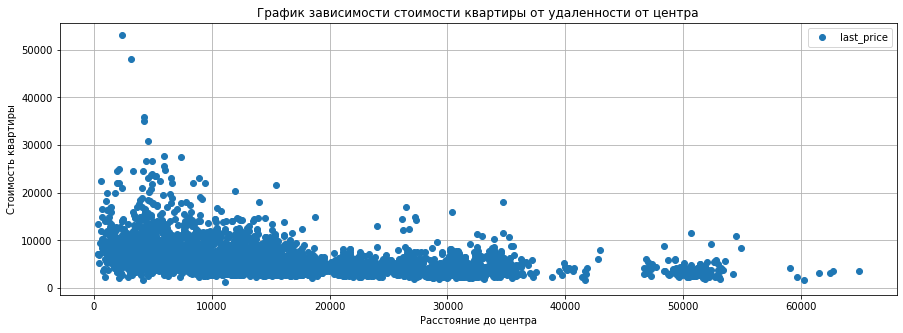

In [54]:
## построим график зависимости стоимости квартир от расстояния до центра города 
(
    data_new.pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(15, 5))
)   
plt.title('График зависимости стоимости квартиры от удаленности от центра')
plt.xlabel('Расстояние до центра')
plt.ylabel('Стоимость квартиры')

####  Промежуточный вывод

Из графика и коэффициента корреляции видно, что связи между стоимостью квартиры и расположением от центра есть, но не сильная.

В центре есть как очень дорогие, так и совсем не дорогие квартиры. Так же можно наблюдать, что удаленные от центра квартиры тоже могут стоить дорого.

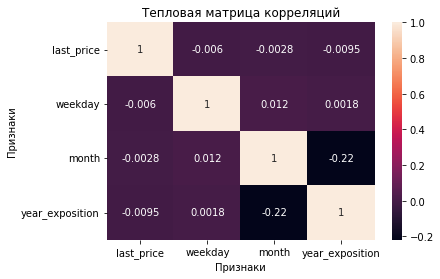

In [55]:
#посчитаем коэффициент корреляции по дате размещения объявления
corr_1 = data_new[['last_price', 'weekday', 'month', 'year_exposition']].corr()
figsize=(10, 8)
sns.heatmap(corr_1,
            xticklabels=corr_1.columns.values,
            yticklabels=corr_1.columns.values,
            annot=True )
plt.title('Тепловая матрица корреляций')
plt.xlabel("Признаки")
plt.ylabel("Признаки")
plt.show()

Text(0, 0.5, 'Стоимость квартиры')

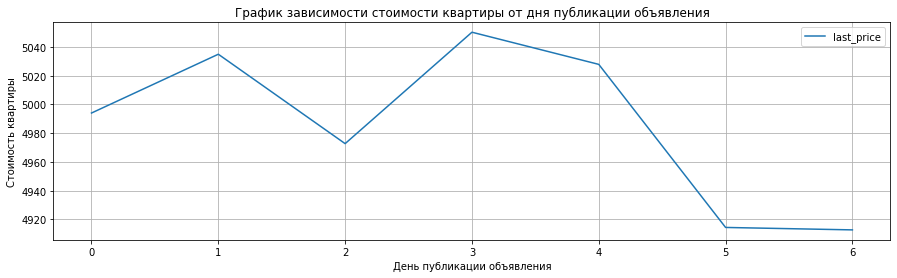

In [56]:
#построим график зависимости стоимости квартиры от дня недели когда было размещено объявление
data_new.pivot_table(index='weekday', values='last_price').plot(grid=True, figsize=(15, 4))
plt.title('График зависимости стоимости квартиры от дня публикации объявления')
plt.xlabel('День публикации объявления')
plt.ylabel('Стоимость квартиры')

Text(0, 0.5, 'Стоимость квартиры')

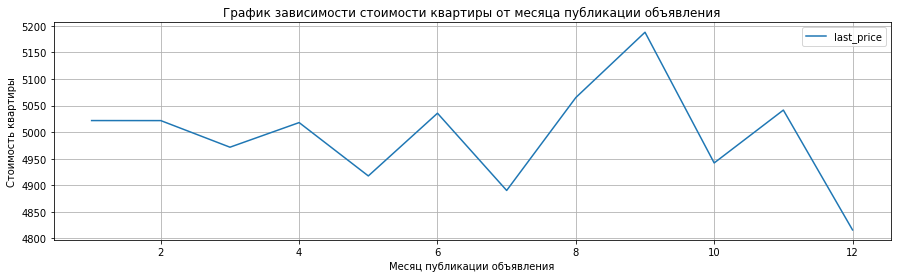

In [57]:
#построим график зависимости стоимости квартиры от месяца когда было размещено объявление
data_new.pivot_table(index='month', values='last_price').plot(grid=True, figsize=(15, 4))
plt.title('График зависимости стоимости квартиры от месяца публикации объявления')
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Стоимость квартиры')

Text(0, 0.5, 'Стоимость квартиры')

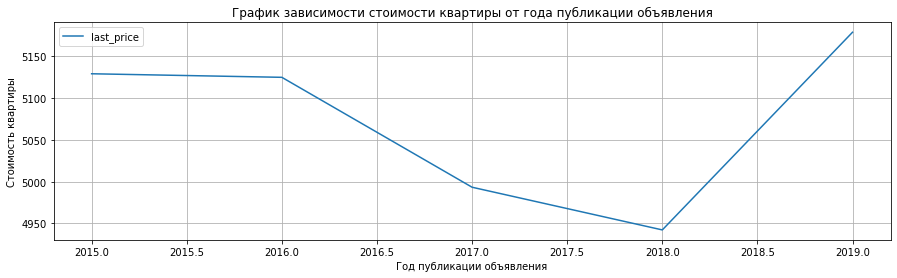

In [58]:
#построим график зависимости стоимости квартиры от года когда было размещено объявление
data_new.pivot_table(index='year_exposition', values='last_price').plot(grid=True, figsize=(15, 4))
plt.title('График зависимости стоимости квартиры от года публикации объявления')
plt.xlabel('Год публикации объявления')
plt.ylabel('Стоимость квартиры')

####  Промежуточный вывод

По коэффициенту корреляции, мы видим, что прямой зависимости нет стоимости квартир от того когда было размещенно объявление. 

Но по графикам зависимость наблюдается:

* День недели: дороже всего квартиры, опубликованные в пятница, дешевле всего - в субботу.
* Месяц: дешевле всего продаются квартиры, размещенные в июле месяце. Стоимость квартир возврастает с августа по ноябрь.
* Год: квартиры очень сильно подешевели в 2016-2018 годах, что, вероятно, вызвано некоторым кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться.

In [59]:
# выберем 10 населённых пунктов с наибольшим числом объявлений
city_top_10 = data_new['locality_name'].value_counts().head(10)
city_top_10

Санкт-Петербург      10713
поселок Мурино         491
поселок Шушары         359
Всеволожск             294
Колпино                280
поселок Парголово      270
деревня Кудрово        253
Пушкин                 247
Гатчина                228
Выборг                 178
Name: locality_name, dtype: int64

In [60]:
#выберем из таблицы 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену за 1м2 в каждом населенном пункте
#переведем среднюю стоимость за 1м2 в целое число, для удобство просмотра
#выведем на экран топ-10 населенных пунктов со средней ценой за 1м2 по убыванию
city_price_m_2_mean = data_new.query('locality_name in (@city_top_10.index)').pivot_table( index='locality_name', values='price_m_2')
city_price_m_2_mean = city_price_m_2_mean.astype(int)
city_price_m_2_mean.sort_values('price_m_2', ascending=False)

,price_m_2
locality_name,
Санкт-Петербург,107808
Пушкин,100747
деревня Кудрово,92619
поселок Парголово,89282
поселок Мурино,85808
поселок Шушары,77667
Колпино,74761
Всеволожск,68368
Гатчина,67970


Text(0, 0.5, 'Цена за м2')

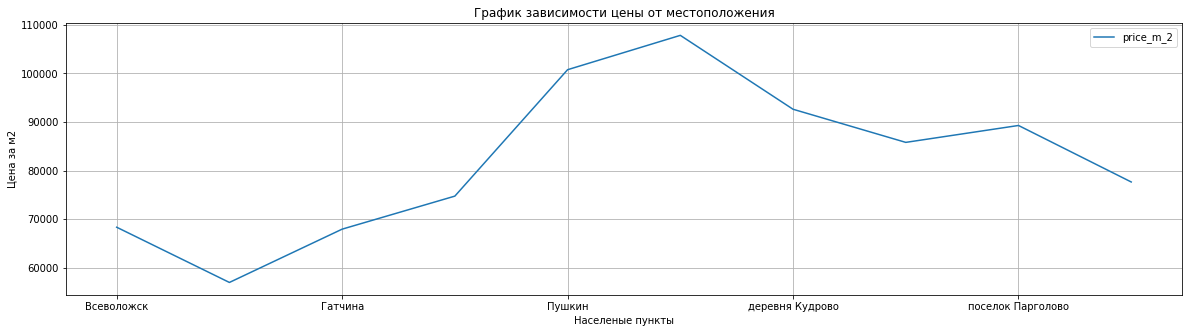

In [61]:
# построим график зависимости цены от местоположения
(
data_new.query('locality_name in (@city_top_10.index)')
        .pivot_table( index='locality_name', values='price_m_2')
        .plot(grid=True, figsize=(20, 5))
)     
plt.title('График зависимости цены от местоположения')
plt.xlabel('Населеные пункты')
plt.ylabel('Цена за м2')

####  Промежуточный вывод

В Санкт-Петербурге самая высокая цена за 1м2 и составляет 103484руб.

Самая низкая цена за 1м2 из топ-10 населенных пунктов в Выборге, составляет 56707руб.

###  Вывод

Больше всего влияют на стоимость квартиры такие факторы как:
* высота этажа - самые низкие цены у квартир на первом этаже
* площадь квартиры -в основном чем больше площадь, дем дороже квартира.
* по количеству комнат - если рассмотреть стоимость всей квартиры, то с увеличением комнат, стоимость увеличивается. Но если посмотреть цену за 1м2, то у однокмнатных квадратный метр стоит дороже.
* стоимость квартир зависит, но не сильно от удаленностиот центра, так же мы можем наблюдать, что есть и дорогие квартиры далеко от центра и не дорогие, наоборот в самом центре.
* можно также проследить связь стоимости квартир от даты размещения.

Самая дорогая стоимость за 1м2 равняется 103,484тыс.руб в Санкт-Питербурге, самый дешовый квадратный метр в Выборге - 56,707тыс.руб. Если сравнивать 10 населенных пунктов с наибольшим числом объявлений.

###  Задание №4
####  Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в Санкт-Петербурге ('locality_name'). Задача — выяснить, какая область входит в центр. Создайть столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайть среднюю цену для каждого километра. Построить график: он должен показывать, как цена зависит от удалённости от центра. Определить границу, где график сильно меняется — это и будет центральная зона. 

In [62]:
# создадим столбец с расстоянием до центра в км, округляем до целого
data_new['center_km'] = (data_new['cityCenters_nearest'] / 1000)
data_new['center_km'] = data_new['center_km'].fillna(value=0).astype(int)

Text(0, 0.5, 'Стоимость квартиры')

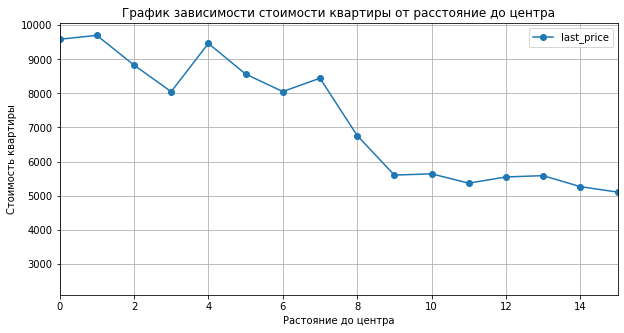

In [63]:
# выберем Санкт-Петербург, построим на график, где указана средняя стоимость для каждого км
(
    data_new.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.title('График зависимости стоимости квартиры от расстояние до центра')
plt.xlabel('Растояние до центра')
plt.ylabel('Стоимость квартиры')

###  Вывод

Из графика видно, что после 7км средняя цена резко снижается. Исходя из этого определим границу центральной зоны - это до 7 км.

###  Задание №5
####  Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайть выводы. Отличаются ли они от общих выводов по всему городу? 

In [64]:
#создадим таблицу куда включим только центр Санк-Петербурга
center_piter = data_new.query('(locality_name == "Санкт-Петербург") & (center_km <= 7)')

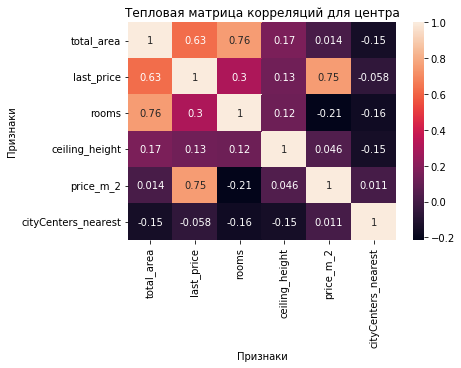

In [65]:
#посчитаем коэффициент корреляции для центра
corr_2 = center_piter[['total_area', 'last_price', 'rooms', 'ceiling_height', 'price_m_2', 'cityCenters_nearest']].corr()
figsize=(10, 8)
sns.heatmap(corr_2,
            xticklabels=corr_2.columns.values,
            yticklabels=corr_2.columns.values,
            annot=True )
plt.title('Тепловая матрица корреляций для центра')
plt.xlabel("Признаки")
plt.ylabel("Признаки")
plt.show()

###  Вывод

Изходя из коэффициента корреляции, можно сделать следующие выводы:

* Зависимость площади от цены почти одинаковая, что в центре, что по всем населенным пунктам и она достаточно сильная (0,72-центр, 0,69- по всей выборке)

* Зависимость цены от количества комнат примерно одинаковая, что в центре, что за его пределами и уже менее сильная (0,43-центра, 0,42-вся выборка)

* Высота потолков за пределами центра играет большую роль, чем в самом центре (0,12-центр, 0,31-вся выборка)

In [66]:
# создадим функцию, которая отрисует по очереди гистограммы для столбцов 'total_area', 'last_price', 'rooms', 'ceiling_height'
# интервал построения графиков рассчитываем автоматически, от Q1-3*iqr до Q3+3*iqr
def draw_plot_center_piter(center_piter, column):
    center_piter_desc = center_piter[column].describe()
    
    # межквартирльный размах
    iqr = center_piter_desc[6] - center_piter_desc[4]
    
    # левый и правый "ус"    
    left_whisker = round(center_piter_desc[4] - 2 * iqr, 2)
    right_whisker = round(center_piter_desc[6] + 2 * iqr, 2)

    # левый "ус" не должен быть меньше минимального значения
    if left_whisker < center_piter_desc[3]:
        left_whisker = center_piter_desc[3] 
        
    # правый "ус" не должен быть больше максимального значения
    if right_whisker > center_piter_desc[7]: 
        right_whisker = center_piter_desc[7]
        
    return [left_whisker, right_whisker]

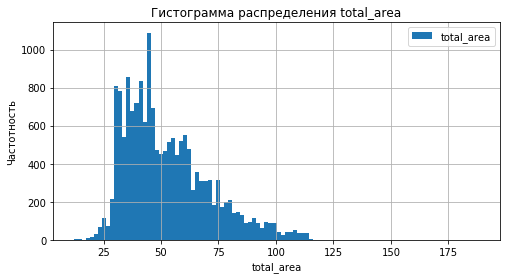

count    16681.000000
mean        52.655539
std         18.505072
min         12.000000
25%         38.350000
50%         48.000000
75%         63.000000
max        114.600000
Name: total_area, dtype: float64

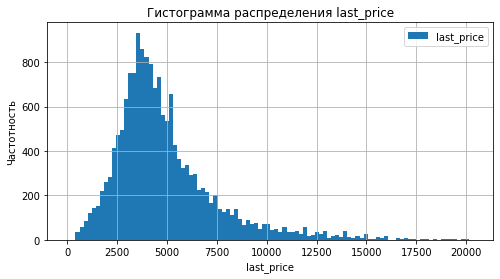

count    16681.000000
mean      5001.402448
std       3026.740045
min         12.190000
25%       3290.000000
50%       4300.000000
75%       5900.000000
max      53000.000000
Name: last_price, dtype: float64

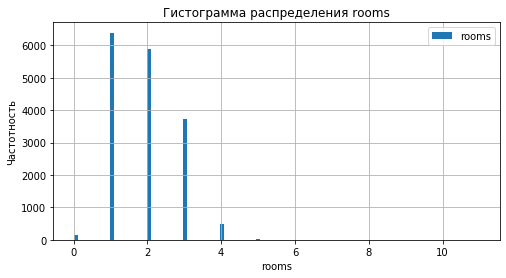

count    16681.000000
mean         1.887896
std          0.877796
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

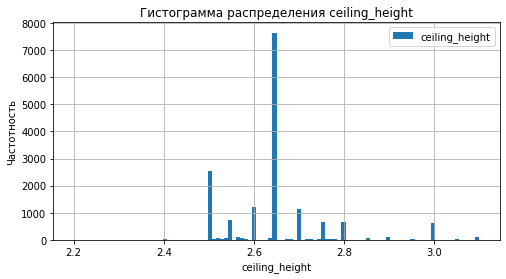

count    16681.000000
mean         2.657778
std          0.130324
min          2.200000
25%          2.600000
50%          2.650000
75%          2.650000
max          3.220000
Name: ceiling_height, dtype: float64

In [67]:
#переберем циклом все нужные нам столбцы
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for col in columns:
    rang = draw_plot(data, col)
    data_new.plot(y=col, kind='hist', bins=100, grid=True, figsize=(8,4), range=(rang[0], rang[1]))
    plt.title(f'Гистограмма распределения {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Частотность')
    plt.show()
    display(data_new[col].describe())

###  Вывод

**total_area**

Из данных видно, что средняя площадь в центре больше, чем по всей выборке. Квартир с площадью меньше 20м2 больше в центре. Так же квартир более 80м2, тоже больше в центре.

**last_price**

В центре цены на кваритры больше, чем за его пределами, что вполне ожидаемо. Квартиры с максимальной ценой есть как в центре, так и за его пределами. А вот минималная цена в центре и за его пределами, очень сильно отличается, 1686тыс.ру. и 12,19тыс.руб.

**rooms**

В центре больше всего 2ух комнатных квартир, по всей выборке лидируют однокомнатные. Шестикомнатные квартиры есть только в центре.

**ceiling_height** 

Чаще всего встречаются полотки высотой 2,65м как в центре, так и по всей выборке. Потолки 2,5м встречаются чаще за пределами центра.

Text(0, 0.5, 'цена')

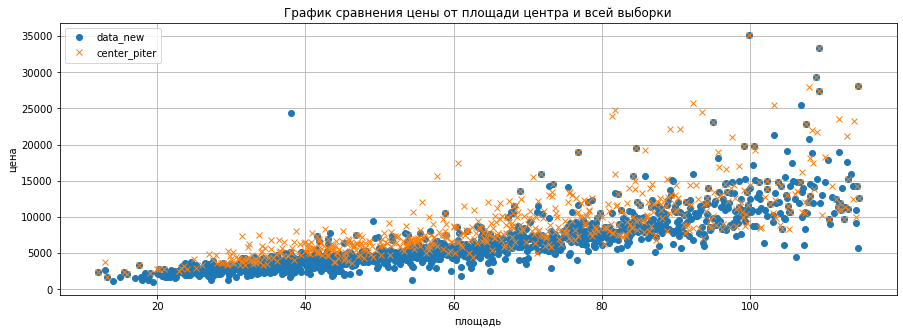

In [68]:
#Построим две гистограммы как влияют общая площадь на цену: по всей выборке и только для центра.
a = data_new.pivot_table(index='total_area', values='last_price')

b = center_piter.pivot_table(index='total_area', values='last_price')
plt.show()

ax = a.plot(y = 'last_price', grid=True, style='o', label='data_new', figsize=(15, 5), legend=True, title='График сравнения цены от площади центра и всей выборки')
b.plot(y = 'last_price', grid=True, style='x', ax=ax, label='center_piter', figsize=(15, 5), legend=True)
ax.set_xlabel('площадь') 
ax.set_ylabel('цена') 

###  Вывод

По графику видно, что квартиры с площадью до 80м2 в центре стоят дороже, чем на периферии. После 80м2 можно наблюдать, что квартиры, находящиеся за центром, тоже стоят дорого.

Text(0, 0.5, 'цена')

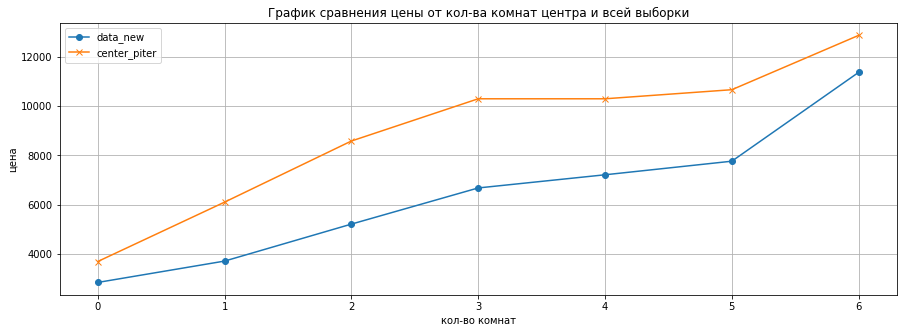

In [69]:
#Построим две гистограммы как влияют количество комнат на цену: по всей выборке и только для центра.
c = data_new.pivot_table(index='rooms', values='last_price')

d = center_piter.pivot_table(index='rooms', values='last_price')
plt.show()

ax = c.plot(y = 'last_price', grid=True, style='o-', label='data_new', figsize=(15, 5), legend=True, title='График сравнения цены от кол-ва комнат центра и всей выборки')
d.plot(y = 'last_price', grid=True, style='x-', ax=ax, label='center_piter', figsize=(15, 5), legend=True)
ax.set_xlabel('кол-во комнат') 
ax.set_ylabel('цена') 

###  Вывод

По графику видно, что в центре города зависимсть количества комнат от цены, более сильная, чем по всей выборке. Стоимость как мы отметили выше, дороже в центре. 5ти комнатные квартиры, за пределами центра стоят намного дешевле, чем в центре.

Text(0, 0.5, 'цена')

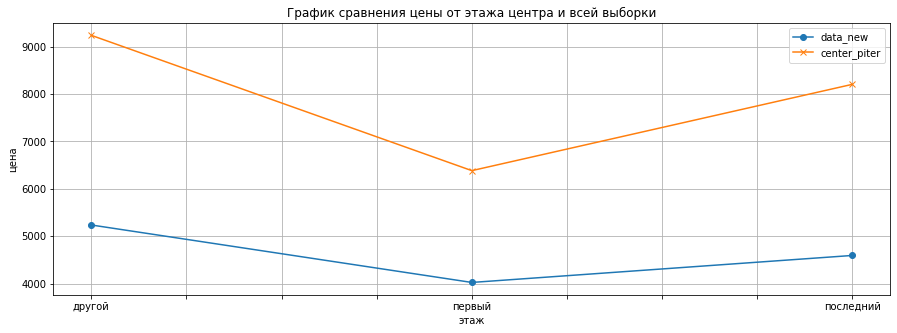

In [70]:
#Построим две гистограммы как влияет этаж на цену: по всей выборке и только для центра.
e = data_new.pivot_table(index='floor_flat', values='last_price')

f = center_piter.pivot_table(index='floor_flat', values='last_price')
plt.show()

ax = e.plot(y = 'last_price', grid=True, style='o-', label='data_new', figsize=(15, 5), title='График сравнения цены от этажа центра и всей выборки')
f.plot(y = 'last_price', grid=True, style='x-', ax=ax, label='center_piter', figsize=(15, 5), legend=True)
ax.set_xlabel('этаж') 
ax.set_ylabel('цена') 

###  Вывод

Квартиры на первых этажах в центре стоят дороже даже чем средний этаж по всем населенным пунктам. В целом первые этажи стоят дешевле, чем последние как в центре так и за его пределами. Но можно отметить, что в центре разница между средним и последним этажем почти минимальная, в то время как по всей выборке видно, что средний этаж в разы дороже чем последний.

Text(0, 0.5, 'цена')

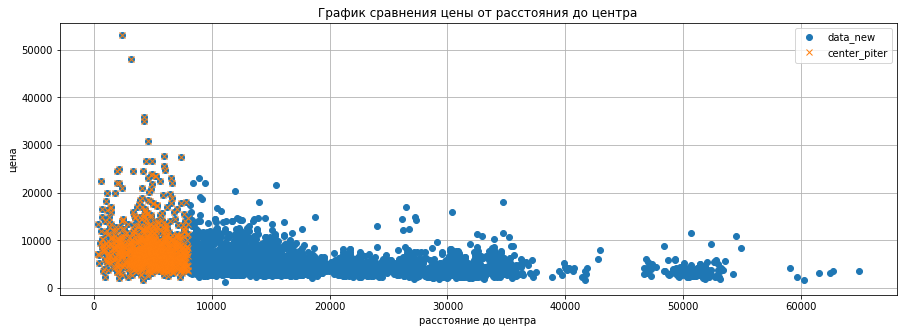

In [71]:
#Построим две гистограммы как влияет удаленность от центра на стоимость квартир: по всей выборке и только для центра.
g = data_new.pivot_table(index='cityCenters_nearest', values='last_price')

h = center_piter.pivot_table(index='cityCenters_nearest', values='last_price')
plt.show()

ax = g.plot(y = 'last_price', grid=True, style='o', label='data_new', figsize=(15, 5), title='График сравнения цены от расстояния до центра')
h.plot(y = 'last_price', grid=True, style='x', ax=ax, label='center_piter', figsize=(15, 5), legend=True)
ax.set_xlabel('расстояние до центра') 
ax.set_ylabel('цена') 

###  Вывод

Из графика следует, как в центре, так и за его пределами очень слабая зависимость удаленности от центра и стоимости квартир. Мы наблюдаем, что в самом центре есть как очень дорогие, так и одни из самых дешевых квартир. По всей выборке зависимость цены от растояния, чуть сильнее.

Text(0, 0.5, 'цена')

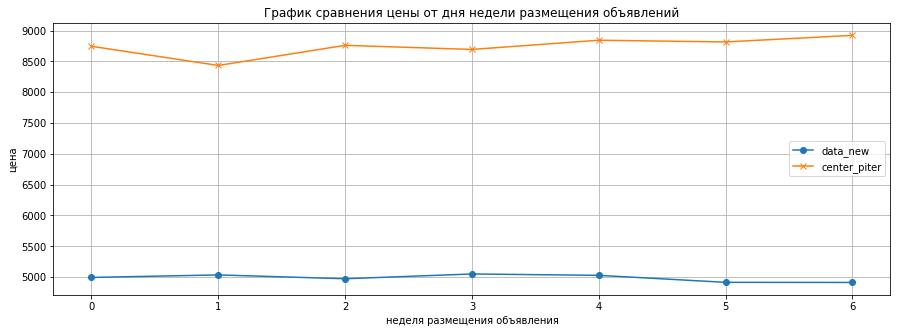

In [72]:
#Построим две гистограммы как влияет день недели размещения объявления на стоимость квартир: по всей выборке и только для центра.
i = data_new.pivot_table(index='weekday', values='last_price')

j = center_piter.pivot_table(index='weekday', values='last_price')
plt.show()

ax = i.plot(y = 'last_price', grid=True, style='o-', label='data_new', figsize=(15, 5), title='График сравнения цены от дня недели размещения объявлений')
j.plot(y = 'last_price', grid=True, style='x-', ax=ax, label='center_piter', figsize=(15, 5), legend=True)
ax.set_xlabel('неделя размещения объявления') 
ax.set_ylabel('цена') 

###  Вывод

Из графика можно наблюдать, что по всей выборке идет более стабильное распределение публикаций относительно дня недели, к выходным количество чуть снижается. В центре количество публикаций примерно в 1,5 раза больше, в понедельник и четверг количество уменьшается, всех больше размещают объявления в воскресение.

Text(0, 0.5, 'цена')

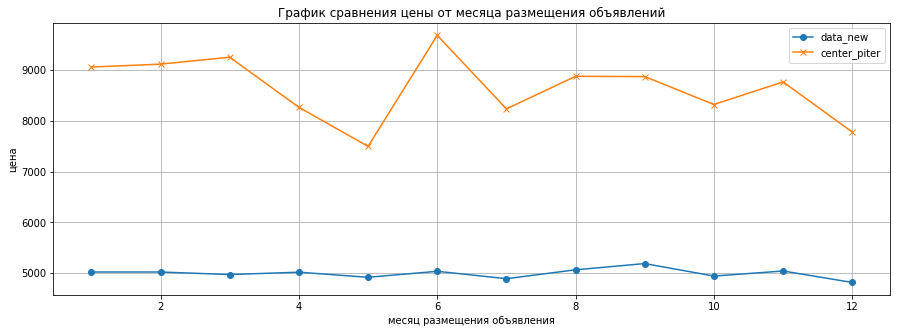

In [73]:
#Построим две гистограммы как влияет месяц размещения объявления на стоимость квартир: по всей выборке и только для центра.
k = data_new.pivot_table(index='month', values='last_price')

l = center_piter.pivot_table(index='month', values='last_price')
plt.show()

ax = k.plot(y = 'last_price', grid=True, style='o-', label='data_new', figsize=(15, 5), title='График сравнения цены от месяца размещения объявлений')
l.plot(y = 'last_price', grid=True, style='x-', ax=ax, label='center_piter', figsize=(15, 5), legend=True)
ax.set_xlabel('месяц размещения объявления') 
ax.set_ylabel('цена') 

###  Вывод

График так же показывает, что по количеству больше размещают объявления в центре. По всей выборке идет более стабилное распределение, чем в центре. Общее у графиков то, что всех меньше размещают объявления в июне, к августу идет рост и длится до сентября, далее в центре идет на спад, а на периферии держится до ноябряь, но к новому году и там, и там идет на спад. 

Text(0, 0.5, 'цена')

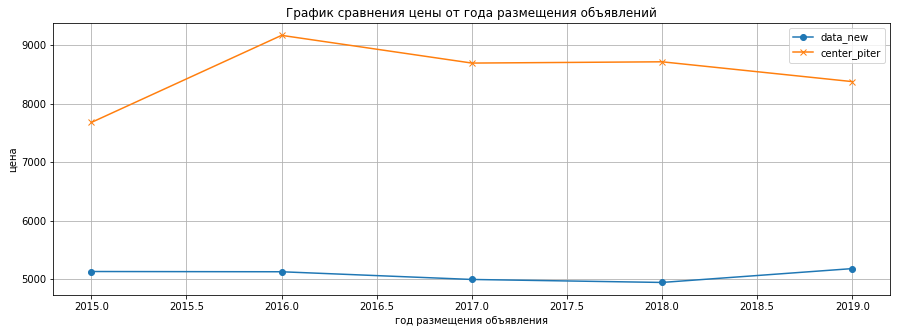

In [74]:
#Построим две гистограммы как влияет год размещения объявления на стоимость квартир: по всей выборке и только для центра.
m = data_new.pivot_table(index='year_exposition', values='last_price')

n = center_piter.pivot_table(index='year_exposition', values='last_price')
plt.show()

ax = m.plot(y = 'last_price', grid=True, style='o-', label='data_new', figsize=(15, 5), title='График сравнения цены от года размещения объявлений')
n.plot(y = 'last_price', grid=True, style='x-', ax=ax, label='center_piter', figsize=(15, 5), legend=True)
ax.set_xlabel('год размещения объявления') 
ax.set_ylabel('цена') 

###  Вывод

Мы можем наблюдать интересную особенность, в то время как по всем населенным пунктам шел спад по количеству размещаемых объявлений с 2016 по 2018 года, в центре же наоборот в данные годы шел подъем продаж квартир. И наоброт в то время как к 2019 шло увеличение количества объвлений по всей выборке, в центре случился значительный их спад.

# Общий вывод

1. Удалили пропуски, составляющие данные менее 1%, в столбцах  floors_total и locality_name.


2. Для автоматизации процесса, при заполнении объявлений о продаже квартиры, можно порекомендовать:

* Сделать так, чтобы не было возможности поставить в количестве комнат - 0. Сделать кнопки 1,2,3 и т.д и кнопку аппартаменты. Так данные будут достовернее и с ними легче будет работать.

* Так же при заполнении данных пользователем о количестве балконов, поставить кнопку "нет балкона", таким образом с данными будет работать проще и они будут достовернее.

* Сказать коллегам, кто отвечает за выгрузку данных, чтобы они обратили внимание на столбец days_exposition, количество пропусков составляет более 13%, что достаточно много. Возможно они смогут проработать этот вопрос и уменьшить количество пропусков.

* Из выгрузки картографических данных, можно брать, только информацию, расстояние до центра города и аэропорта.
Наличе парков и прудов и их расстояние, не самые важные данные для исследования, а если человеку очень они важны, он с легкостью может сам посмотреть в яндекс.картах введя адрес квартиры.

3. Исследовав квартиры по всей выборке, можно сделать следующие выводы:

* Чаще всего встречаются квартиры с площадью от 35 до 60 м2;

* Больше всего предложений со стоимостью квартир от 3 до 5 млн. руб;

* Самые популярные 1 и 2 - комнатные квартиры;

* Обычное время продажи квартир составляет до 100 дней, самыми быстрыми продажами можно считать продажи до 30 дней, самыми долгими - выше 550 дней.

* По высоте этажа - самые низкие цены у квартир на первом этаже

* Можно проследить зависимость стоимости квартиры от ее площади. Чем больше площадь, тем дороже квартира. Но если посмотреть на стоимость квадратного метра квартиры, то у однокомнатных квартир квадратный метр стоит дороже.

* Прямой связи стоимости квартиры от расстояния до центра не обнаружено. Квартиры в центре могут иметь и самую большую цену и одновременно самую низкую цену. В отдаленных районах мы можем так же наблюдать наличие высоких цен за квартиры.

* Проанализировав по дате размещения объявлений, было установлено: самые низкие цены на квартиры, размещенные в июле, самые большие цены с августа по ноябрь; был спад на рынке недвижимости в 2016-2018 годах, с 2019 можно наблюдать опять подъем цен.

4. Было найдено 10 населленых пунктов с самым большим числом объявлений. Самая большая стоимость за 1м2 составила 103484 руб в Санкт-Петербурге, самая низкая - 56707 м2 в Выборге.

5. Выбрав из столбца locality_name только Санкт-Петербург, построили график, где указана средняя стоимость для каждого км и нашли резкое понижение цены в районе 7км. Исходя их этого, обозначили центром, зону до 7 км и проанализировали только ее.

6. Из данного анализа обнаружили:

* Стоимость квартир в центральной зоне выше. Минималные цены в центре и за его пределами, очень сильно отличается, 1686тыс.ру. и 12,19тыс.руб.

* Квартиры с площадью до 80м2 в центре стоят дороже, чем на периферии. После 80м2 можно наблюдать, что квартиры, находящиеся за центром, тоже стоят дорого.

* В центре чаще всего встречаются 2ух комнатные квартиры, по всем населенным пунктам более популярные 1-комнатные квартиры. 6ти комнатные квартиры встречаются только в центре.

* Средняя высота потолка 2,65м встречается в основном как в центре, так и за его пределами. А вот потолки - 2,5м, чаще встречаются за пределами центра.

* Квартиры на первых этажах в центре стоят дороже даже чем средний этаж по всем населенным пунктам. В целом первые этажи стоят дешевле, чем последние как в центре так и за его пределами. Но можно отметить, что в центре разница между средним и последним этажем почти минимальная, в то время как по всей выборке видно, что средний этаж в разы дороже чем последний.

* Можно отметить, что в центре и за его пределами очень слабая зависимость между удаленностью от центра и стоимостью квартир. Мы наблюдаем, что в самом центре есть как очень дорогие, так и одни из самых дешевых квартир. По всей выборке зависимость цены от растояния, чуть сильнее.

* Относительно дня публикации объявления по всей выборке идет более стабильное распределение публикаций, к выходным количество чуть снижается. В центре количество публикаций примерно в 1,5 раза больше. В понедельник и четверг количество уменьшается, всех больше размещают объявления в воскресение. 

* По месяцу размещения объявлений. Общее у графиков то, что всех меньше размещают объявления в июне, к августу идет рост и длится до сентября, далее в центре идет на спад, а на периферии держится до ноябряь, но к новому году и там, и там идет на спад.

* По году размещения объявлений. Мы можем наблюдать интересную особенность, в то время как по всем населенным пунктам шел спад по количеству размещаемых объявлений с 2016 по 2018 года, в центре же наоборот в данные годы шел подъем продаж квартир. И наоброт в то время как к 2019 шло увеличение количества объвлений по всей выборке, в центре случился значительный их спад.